In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from Backtestingtools.electron_pnl_analyzer import PnLAnalyzer
from Backtestingtools import trade_loader
from Backtestingtools.ticks_and_books_helper import load_ticks_and_books, query_between


In [5]:
df_dict = trade_loader.build_df_dict2('2025,6,2','2025,6,6',strat='capital_neutrino_txf')

Loading fills by day: 100%|██████████| 5/5 [00:00<00:00, 15.66it/s]



每日總損益：
日期           |       總損益 (USD)
--------------------------------------------------
2025-06-02   |          134.64
2025-06-03   |          -53.13
2025-06-04   |          -76.14
2025-06-05   |         -140.25
2025-06-06   |         -342.10

top 5 days loss：
1. 2025-06-06 → -342.10 USD
2. 2025-06-05 → -140.25 USD
3. 2025-06-04 → -76.14 USD
4. 2025-06-03 → -53.13 USD
5. 2025-06-02 → 134.64 USD


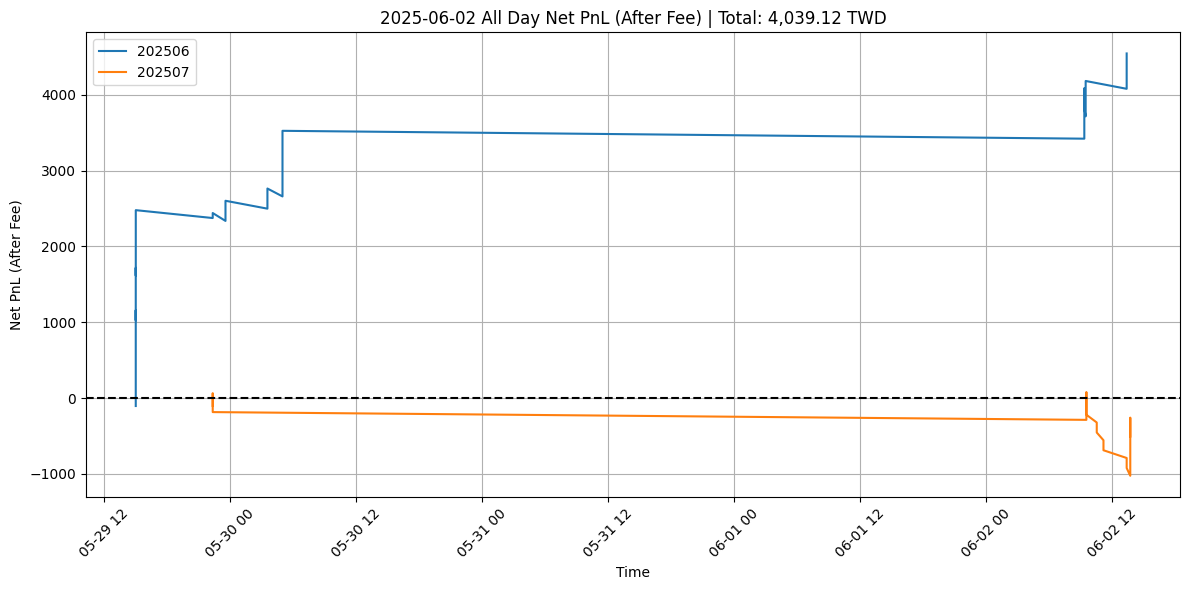


 2025-06-02 Top Ten Loss：
                      Time Contract Product  Price  size  Cumulative Position  PnL Change     Fee  PnL Net
2025-05-29 22:19:49.127129   202507     MXF  20675    -3                    0        -150  99.525 -249.525
2025-06-02 13:43:00.222902   202507     MXF  20588     3                    0        -150  99.264 -249.264
2025-06-02 09:32:09.308568   202507     MXF  20598     2                  -50        -150  66.196 -216.196
2025-05-29 15:00:00.048375   202506     MXF  21287    -4                 -200           0 135.148 -135.148
2025-06-02 09:20:22.829707   202506     MXF  20933    -4                 -200           0 133.732 -133.732
2025-06-02 09:20:22.839873   202506     MXF  20933     4                    0           0 133.732 -133.732
2025-06-02 10:31:25.495597   202507     MXF  20584    -4                    0           0 132.336 -132.336
2025-06-02 13:22:24.378372   202507     MXF  20552    -4                    0           0 132.208 -132.208
2025-06-02

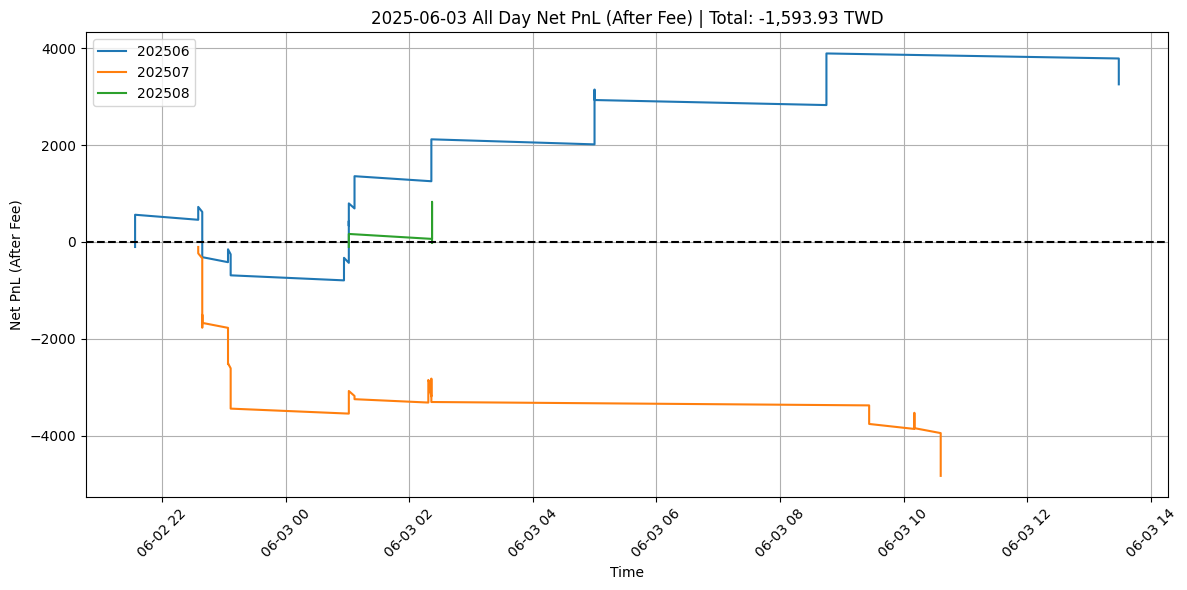


 2025-06-03 Top Ten Loss：
                      Time Contract Product  Price  size  Cumulative Position  PnL Change     Fee   PnL Net
2025-06-02 22:38:52.425681   202507     MXF  20659    -1                  150       -1400  33.159 -1433.159
2025-06-02 22:38:52.428655   202506     MXF  20965    -4                    0        -800 133.860  -933.860
2025-06-03 02:22:02.278318   202508     MXF  20593     3                    0        -750  99.279  -849.279
2025-06-02 23:06:27.809323   202507     MXF  20663     2                 -100        -600  66.326  -666.326
2025-06-03 10:36:03.382313   202507     MXF  20719     1                 -150        -600  33.219  -633.219
2025-06-03 13:29:00.975568   202506     MXF  20966    -4                    0        -400 133.864  -533.864
2025-06-02 23:03:53.309214   202507     MXF  20657    -2                   50        -450  66.314  -516.314
2025-06-03 02:21:22.779834   202507     MXF  20765     1                 -100        -450  33.265  -483.265
2

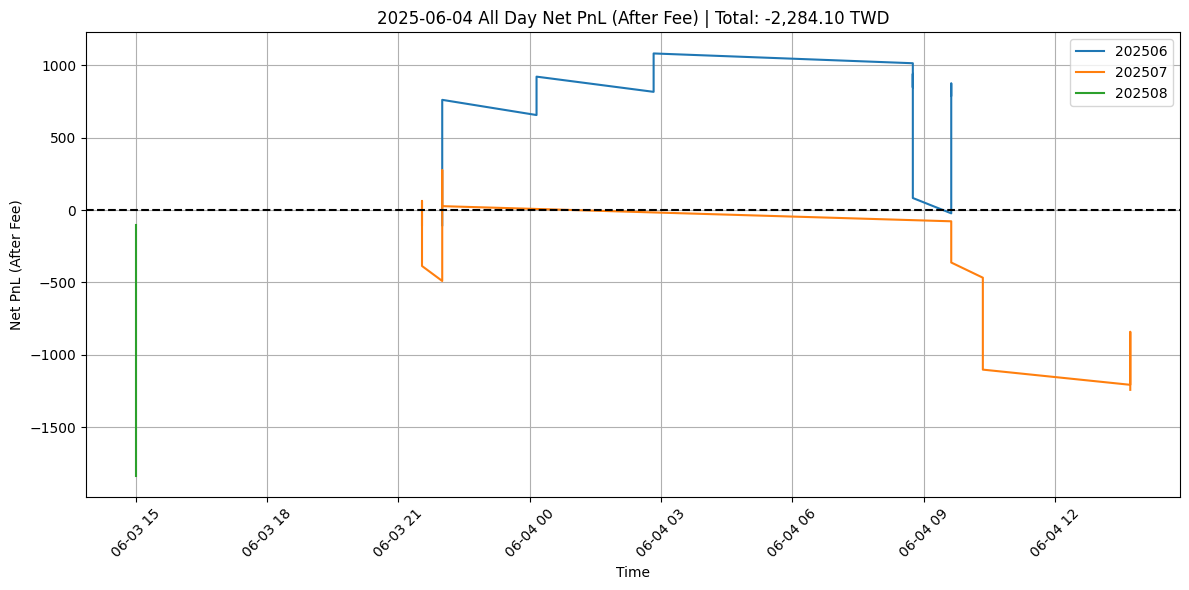


 2025-06-04 Top Ten Loss：
                      Time Contract Product  Price  size  Cumulative Position  PnL Change     Fee   PnL Net
2025-06-03 15:00:00.672584   202508     MXF  20561     1                 -150       -1400  33.061 -1433.061
2025-06-04 10:20:57.193756   202507     MXF  21181    -2                  100        -400  67.362  -467.362
2025-06-04 13:43:00.298169   202507     MXF  21195    -3                    0        -300 101.085  -401.085
2025-06-03 21:32:19.254885   202507     MXF  20780    -2                    0        -200  66.560  -266.560
2025-06-04 08:45:00.120237   202506     MXF  21280     3                    0        -150 101.340  -251.340
2025-06-04 09:37:38.160457   202507     MXF  21142    -3                    0        -150 100.926  -250.926
2025-06-03 22:00:02.144463   202507     MXF  20850     3                    0        -150 100.050  -250.050
2025-06-04 08:45:00.120181   202506     MXF  21279     1                 -150        -200  33.779  -233.779
2

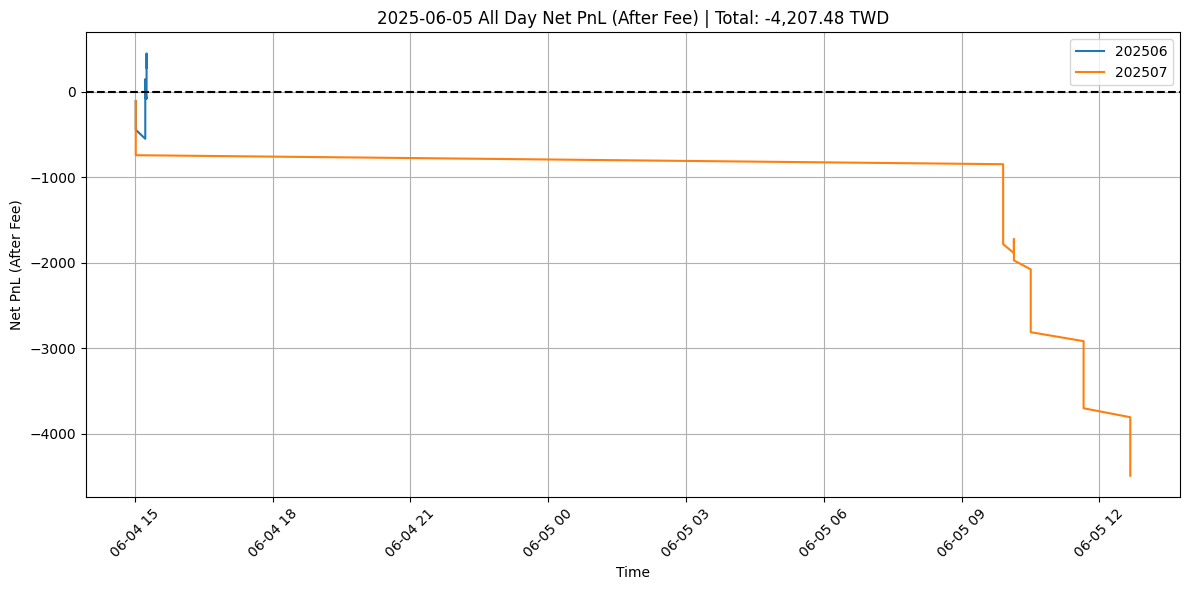


 2025-06-05 Top Ten Loss：
                      Time Contract Product  Price  size  Cumulative Position  PnL Change     Fee  PnL Net
2025-06-05 09:54:12.821699   202507     MXF  21353    -4                    0        -800 135.412 -935.412
2025-06-05 10:30:17.372886   202507     MXF  21230    -4                    0        -600 134.920 -734.920
2025-06-05 12:40:19.233811   202507     MXF  21252     2                 -100        -400  67.504 -467.504
2025-06-04 15:01:04.484677   202507     MXF  21189    -2                  100        -400  67.378 -467.378
2025-06-05 11:39:20.613160   202507     MXF  21261     1                 -150        -400  33.761 -433.761
2025-06-04 15:01:04.484358   202506     MXF  21480    -4                    0        -200 135.920 -335.920
2025-06-05 10:08:17.358283   202507     MXF  21282    -3                    0        -150 101.346 -251.346
2025-06-05 11:39:20.613160   202507     MXF  21262     1                 -100        -150  33.762 -183.762
2025-06-04

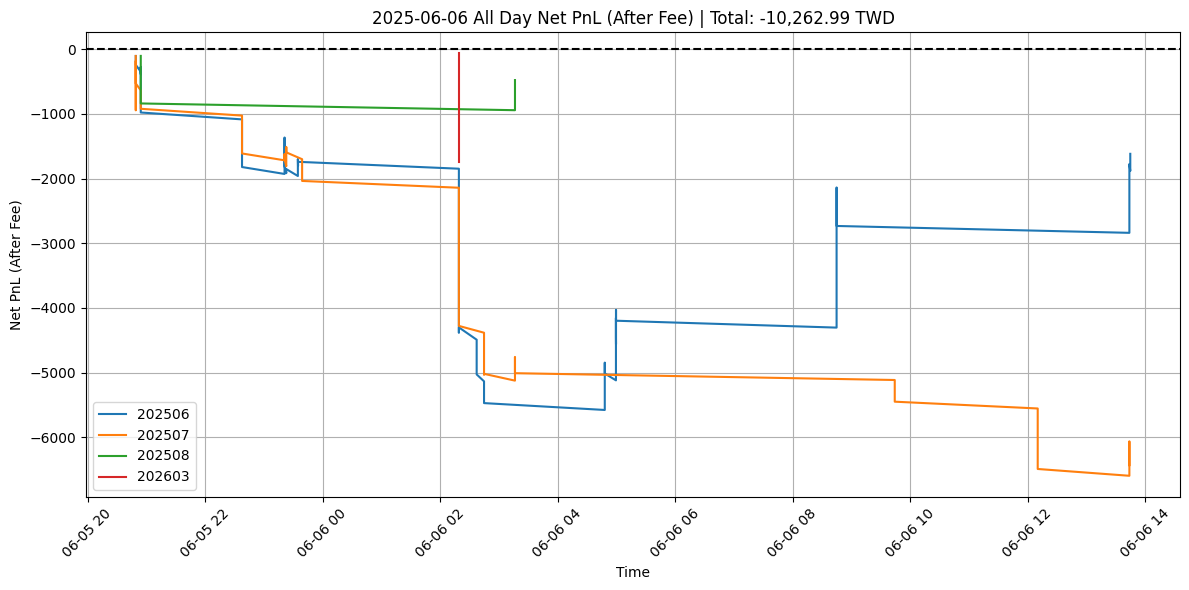


 2025-06-06 Top Ten Loss：
                      Time Contract Product  Price  size  Cumulative Position  PnL Change     Fee   PnL Net
2025-06-06 02:19:15.950701   202507     MXF  21326     4                    0       -2000 135.304 -2135.304
2025-06-06 02:19:15.949911   202506     MXF  21619     1                 -150       -2000  34.119 -2034.119
2025-06-06 12:10:23.617207   202507     MXF  21260     4                    0        -800 135.040  -935.040
2025-06-06 02:19:15.953052   202603     MXF  20925    -2                    0        -800  66.850  -866.850
2025-06-06 02:19:15.952075   202603     TXF  20933     1                  100        -700 103.732  -803.732
2025-06-05 22:37:48.063155   202506     MXF  21618     4                    0        -600 136.472  -736.472
2025-06-05 20:49:16.179041   202507     MXF  21316     4                    0        -600 135.264  -735.264
2025-06-05 20:54:22.834538   202508     MXF  21196    -4                    0        -600 134.784  -734.784
2

In [6]:
# PnLAnalyzer
analyzer = PnLAnalyzer(df_dict)
# carry + pnl
analyzer.run_full_report()



